# Main Natural Gas Indicators and Datasets in Canada


## Importance of Energy Data

Energy information is essential to drive forward-looking decision by governments, industries, and Canadians.  It plays a key role in enhancing public confidence, competitiveness and the Government’s ability to support the low-carbon transition.

## Overview of Energy Information in Canada

Energy information includes statistics, data, analysis and projections related to the production, transformation, distribution and consumption of energy; as well as the linkages between energy and the economy, society and environment. 

Canada's energy information system is a collective contribution of several organizations, including:
- four federal departments or agencies: 
    - Natural Resources Canada (__[link](https://www.nrcan.gc.ca/home)__);
    - Statistics Canada (__[link](https://www.statcan.gc.ca/eng/start)__);
    - Environment and Climate Change Canada (__[link](https://www.ec.gc.ca/?lang=En)__);
    - National Energy Board (__[link](https://www.neb-one.gc.ca/index-eng.html)__).
    - provincial and territorial government departments, regulators and utilities boards;
- energy market participants (ex. power producers, pipeline companies, system operators, etc.); 
- industry associations and academic research bodies; 
- Canada’ Open Government website (__[link]()__);

## Canadian Energy Information Hub

Although Canadian energy information is abundant, it can be difficult to navigate, interpret and verify, particularly for non-experts. Moreover, data measurements, definitions and reporting standards vary amongst information providers. Often, data is not available in structured and machine-readable formats. Finally, data releases are often not timely, and lags are considered too long for a growing demand for real-time information. 

Recognizing the complexity of Canada’s current energy information system, in June 2019, the Government of Canada launched the Canadian Energy Information Hub (__[link](https://www.statcan.gc.ca/eng/topics-start/energy)__). The Hub is a one stop shop for energy information that provides a single point of access for all federal-government statistics and provides links to existing body of energy information products. 

The Hub also contains Energy Information Indicators for major energy commodities, including natural gas (link to crude oil, electricity). 

## Goal of this notebook: 

The goal of this notebook is three-fold:
- 1) Identify the main datasets used in Energy Commodity Indicators dashboard for natural gas (__[link](https://www.neb-one.gc.ca/nrg/tl/nrgcmmdt/nrgndctrntrlgs-eng.html)__);
- 2) Load the main datasets into the notebook and provide an overview of key trends;
- 3) Provide links to and descriptions of complementary and publicly available datasets.

__Data sets files are not provided to accompany the notebook. Rather, data is loaded directly into the notebook from the source provider. This ensures transparency, reproducibility and timeliness.__

__Datasets used in this notebook come from multiple sources and are often not in flat, machine-readable formats. Also, measurement units between the datasets are not standardized. Therefore, to provide analytical value, data sets in the notebook are first transformed to ensure comparability and standardization. Datasets used in this notebook all come from free public sources.__

For units not available in this notebook, the National Energy Board offers a site with extensive energy conversion tables (__[link](https://apps.neb-one.gc.ca/Conversion/conversion-tables.aspx?GoCTemplateCulture=en-CA)__). 


In [1]:
# download the following libraries
# !pip install pyxlsb

# import the following libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs
import zipfile
import io
import re
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
from pyxlsb import open_workbook
from pandas.plotting import register_matplotlib_converters
pd.__version__ #To ensure your version of pandas is up to date follow the insructions as this link: https://stackoverflow.com/questions/53085501/how-to-upgrade-pandas-on-google-colab

# set global parameters
plt.style.use('ggplot')
register_matplotlib_converters()
sns.set_palette(sns.color_palette("tab20", 20))

## Energy Information Indicators - Natural Gas:

### Natural Gas Prices
The chart below shows daily natural gas prices at Henry Hub (North America's main trading hub, located in the United States), monthly average prices in Alberta (the province with the most gas production), and monthly average prices for Canadian gas exports and imports. At the residential customer level, the commodity price is added to customer bills in addition to other fixed and variable charges.

#### 1) Main dataset


Natural gas is a globally traded commodity and has a highly developed and integrated market. Gas can be traded between buyers and sellers for an immediate or near-term delivery (for a spot price), or for a forward dateded delivery (for a futures price). Spot and futures prices may vary depending on immediate and future expectations of market conditions. 

Daily spot and futures prices for natural gas are available from the Energy Inforation Agency and are updated daily (__[link](https://www.eia.gov/dnav/ng/hist/rngc1d.htm)__).  

Alberta natural gas prices are published by the Government of Alberta (__[link](https://economicdashboard.alberta.ca/NaturalGasPrice)__).  

Natural gas import and export prices are available from the National Energy Board’s Commodity Tracking System (__[link](https://apps.neb-one.gc.ca/CommodityStatistics/Statistics.aspx?language=english)__).  

#### 2) Load dataset to notebook

In [2]:
# access EIA Henry Hub spot price
url_hh = 'https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDm.xls'
sheet_hh = 'Data 1'
df_hh = pd.read_excel(url_hh, sheet_name=sheet_hh, index_col=None, header=2, parse_dates=['Date'])
df_hh['Date'] = pd.to_datetime(df_hh['Date'].dt.year.astype(str) + ' ' + df_hh['Date'].dt.month.astype(str), 
                                  format = '%Y %m')
df_hh['Henry Hub (US$/GJ)'] = df_hh['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'] * 1.05505585

In [3]:
# access Alberta natural gas prices
url_ab = 'https://economicdashboard.alberta.ca/Download/DownloadFile?extension=csv&requestUrl=https%3A%2F%2Feconomicdashboard.alberta.ca%2Fapi%2FOilPrice'
df_ab = pd.read_csv(url_ab, index_col=None, header=0, parse_dates=['When']).rename(columns={'When':'Date', 'Alberta':'Alberta (CN$/GJ)'})
df_ab = df_ab[df_ab['Type'] == 'NatGas'][['Date', 'Alberta (CN$/GJ)']]

df_prices = df_ab.merge(df_hh[['Date', 'Henry Hub (US$/GJ)']], 'left', on='Date').set_index('Date')
df_prices = df_prices[df_prices.index.year >= 2016]

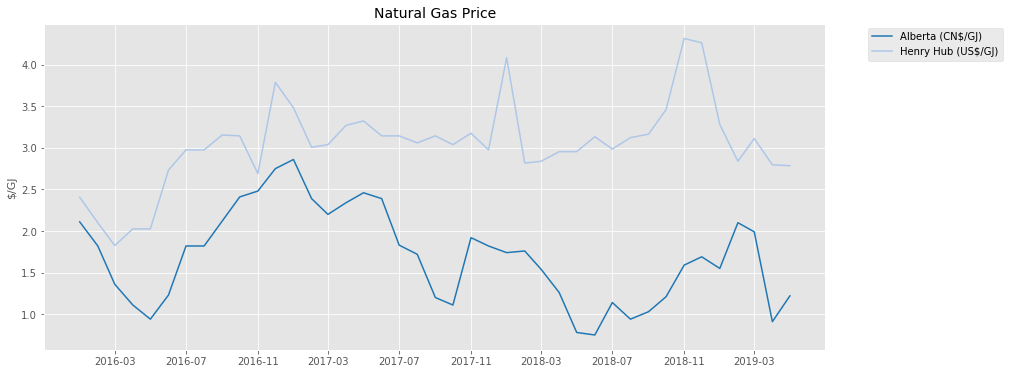

In [4]:
# create charts
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(14,6))

ax1.plot(df_prices.index, df_prices)
ax1.set_ylabel('$/GJ', fontsize=11)
ax1.set_title('Natural Gas Price', fontsize=14)
ax1.legend(df_prices.columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4); 

Due to the highly integrated nature of the Canadian and US markets, Canadian natural gas prices track US prices closely. Variance between the two markets is attributed to regional weather events, pipeline transportation costs and availability of pipeline capacity. 

In 2019, natural gas commodity prices are at historic lows, averaging below $2/GJ. These price levels are comparable to the 1990s (nominal dollars).

In general, natural gas prices in Canada are lowest in British Columbia and Alberta.  This is due to the close proximity of demand (industrial, commercial and residential customers) to supply sources. Natural gas prices are higher in the other provinces, because gas has to be imported and this adds a transportation cost.

#### 3) Other datasets for Canadian natural gas prices

Natural gas price data is also available from provincial regulatory bodies or local natural gas distribution companies. Price data is filed to utility regulators for approval and is contained in regulatory filings. However, the data is often not aggregated in a flat, machine-readable format; is differentiated by non-standardized customer classes which may make provincial comparisons difficult; and may be aggregated for different time periods (ex. monthly, quarterly) in each province. Data on natural gas prices in Canadian provinces comes from: 
- Alberta (__[link](http://www.auc.ab.ca/pages/current-rates-gas.aspx)__);
- British Columbia (__[link](https://www.fortisbc.com/accounts-billing/billing-rates/natural-gas-rates/residential-rates)__);
- Saskatchewan (__[link](https://www.saskenergy.com/residential/resrates_hist.asp)__);
- Manitoba (__[link](http://www.pubmanitoba.ca/v1/regulated-utilities/natural-gas/rates/s_supply.html)__)
- Ontario (__[link](https://www.oeb.ca/rates-and-your-bill/natural-gas-rates)__);
- Quebec
- New Brunswick (__[link](https://naturalgasnb.com/en/for-home/accounts-billing/our-product-offering/#eug-rate-history)__);
- Nova Scotia (__[link](http://www.heritagegas.com/natural-gas/historical-rates/)__);
- New Brunswick (__[link](https://naturalgasnb.com/en/for-home/accounts-billing/our-product-offering/#eug-rate-history)__).


### Canadian Marketable Natural Gas Production
Natural gas production data is administered by provincial governments and aggregated by the NEB. Alberta is Canada's largest producing province, followed by British Columbia and Saskatchewan.





#### 1) Main dataset

Data on the production of natural gas is collecated by provinical governments and is used to assess the collection of royalties or support regulatory mandates. The NEB aggregates provincial government statistics and publishes the Marketable Natural Gas Production in Canada report (__[link](https://www.neb-one.gc.ca/nrg/sttstc/ntrlgs/stt/mrktblntrlgsprdctn-eng.html)__). Data is available since 2000 and is updated by the NEB monthly. Provincial government data may be delayed by up to 6 months.  

More specifically, the NEB aggregates the following province-level statistics:
- __Government of British Columbia__ - Production and distribution of Natural Gas in BC report (__[link](http://www2.gov.bc.ca/gov/content/industry/natural-gas-oil/statistics)__);

    _Marketable Production = Residue Gas plant outlet - BC production only_
    
    
- __Alberta Energy Regulator__ - ST3: Alberta Energy Resource Industries Monthly Statistics (__[link](https://aer.ca/providing-information/data-and-reports/statistical-reports/st3)__);

     _Marketable Production = Well Production + In Situ Well Production – Field Gas Use (Flare, Fuel, Vent, Shrinkage) – Injection Enhanced Recovery (Gas Injection, Acid Gas Injection)_ 
     
     
- __Government of Saskatchewan__  - Natural Gas Volume and Value Summary report (__[link](http://publications.gov.sk.ca/details.cfm?p=89506)__);

     _Marketable Production = Gas Available for Use or Sale_


- __Ontario - Statistics Canada__ - Supply and Disposition of natural gas, monthly Table 25-10-0055-01 (__[link](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510005501)__);


- __Nova Scotia - Canada-Nova Scotia Offshore Petroleum Board__ - Monthly Production Summary report (__[link](http://www.cnsopb.ns.ca/offshore-activity/weekly-activity-reports)__);

    _Marketable Production = raw gas production * 92.5_
    
    
- __New Brunswick - Government of New Brunswick__ – Monthly Production Statistics (__[link](https://www2.gnb.ca/content/dam/gnb/Departments/en/pdf/Minerals-Minerales/Monthly_Statistics.pdf)__);


- __National Energy Board North/Offshore Statistics__ (__[link](http://www.neb-one.gc.ca/nrth/sttstc/index-eng.html)__);


- __Government of Northwest Territories Bureau of Statistics Oil and Gas__ (__[link](https://www.statsnwt.ca/economy/oil-gas/)__).



#### 2) Load dataset to notebook

In [5]:
# access data from the Marketable Natural Gas Production in Canada report (published by the National Energy Board)

url_neb = 'https://www.neb-one.gc.ca/nrg/sttstc/ntrlgs/stt/mrktblntrlgsprdctn-eng.html'  
sheet_prod = '2000+ - cubic feet per day'

r = requests.get(url_neb)
if r.status_code == 200:
  soup = bs(r.content, 'lxml')
  # find the latest data set
  y = 0
  links = soup.find_all('a', attrs={'href': re.compile('^/nrg/sttstc/ntrlgs/stt/(.)*.xlsx?')})
  for link in links:
    new_y = int(link.get('href').split('.')[-2][-4:])
    if y < new_y:
      y = new_y
      url_prod = 'https://www.neb-one.gc.ca' + link.get('href')
     
  df_prod = pd.read_excel(url_prod, sheet_name=sheet_prod, usecols='A:I', header=8, index_col=0, parse_dates=['Date']).dropna(1, 'all').dropna(0, 'all') / 1000
  df_prod.rename(columns={'NS':'Nova Scotia', 'NB':'New Brunswick', 'Sask':'Saskatchewan', 'BC':'British Columbia'}, inplace=True)
  df_prod = df_prod[df_prod.index.year >= 2016].dropna(0, 'any')
else:
  print('Could not access NEB page: ', url_neb)

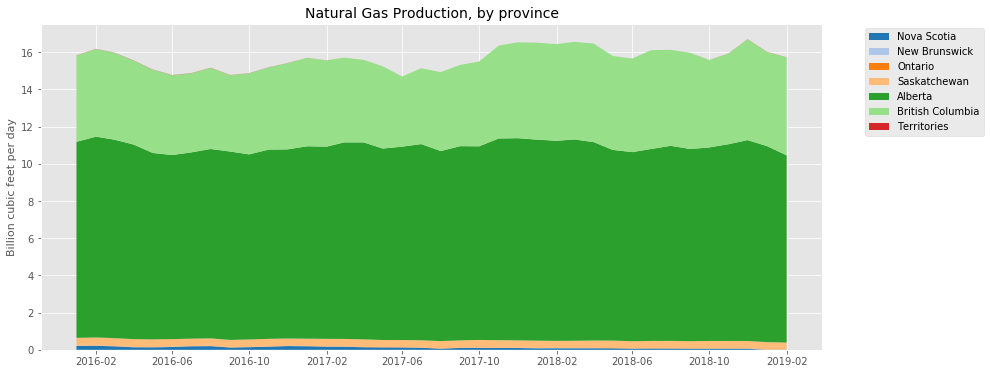

In [6]:
# create charts
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(14,6))

ax1.stackplot(df_prod.index, df_prod.T)
ax1.set_ylabel('Billion cubic feet per day', fontsize=11)
ax1.set_title('Natural Gas Production, by province', fontsize=14)
ax1.legend(df_prod.columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4);

Canadian marketable natural gas production averaged 16.2 Bcf/d in 2018, an increase of 3 per cent over 2017. Alberta is the largest producer of natural gas in Canada, followed by British Columbia and Saskatchewan. Together, the three provinces produce 99 per cent of Canada's total production. Alberta's share of total production has decreased over the last ten years as production in British Columbia increases.

#### 3) Other datasets for Canadian natural gas production


Natural gas production statistics are also published by Statistics Canada in the supply and disposition of natural gas report (CANSIM Table 25-10-0055-01) (__[link](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510005501)__). 

This report employs a different methodology to calculate production of marketable gas compared to the NEB, and therefore the data between the two reports is not the same or equivalent.

### Canadian Natural Gas Demand
Canadian demand for natural gas is seasonal, and increases in the winter, because of increased space heating demand. Alberta is Canada's largest natural gas consumer, because of its large industrial sector, including the oil sands.

#### 1) Main dataset


Monthly data on natural gas demand in Canada is published by Statistics Canada in the supply and disposition of natural gas report (CANSIM Table 25-10-0055-01) (__[link](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510005501)__). Monthly demand data is available for the residential, commercial and industrial sectors, by province.

#### 2) Load dataset to notebook

In [7]:
# access data from the supply and disposition of natural gas report published by Statistics Canada
url_demand = 'https://www150.statcan.gc.ca/n1/tbl/csv/25100055-eng.zip'
file_name = '25100055.csv'
r = requests.get(url_demand, allow_redirects=True)
zip_file = zipfile.ZipFile(io.BytesIO(r.content))
df_demand_all = pd.read_csv(zip_file.open(file_name), index_col=None, header=0, parse_dates=['REF_DATE'])
keep = ['Residential consumption', 'Industrial consumption', 'Commercial consumption']
df_demand = df_demand_all[df_demand_all['Supply and disposition'].isin(keep) & (df_demand_all['UOM'] == 'Cubic metres') 
                              & (df_demand_all['GEO'] != 'Canada')][['REF_DATE', 'GEO', 'Supply and disposition', 'VALUE']]

# convert VALUE to bcf/d
df_demand['Value (Bcf/d)'] = df_demand['VALUE']/(df_demand['REF_DATE'].dt.daysinmonth) / 1000000 * 35.3147 
df_demand.rename(columns={'REF_DATE':'Date', 'GEO':'Region', 'Supply and disposition':'Category'}, inplace=True)
df_demand_prov = df_demand.pivot_table(index='Date', columns='Region', aggfunc=np.sum)['Value (Bcf/d)']

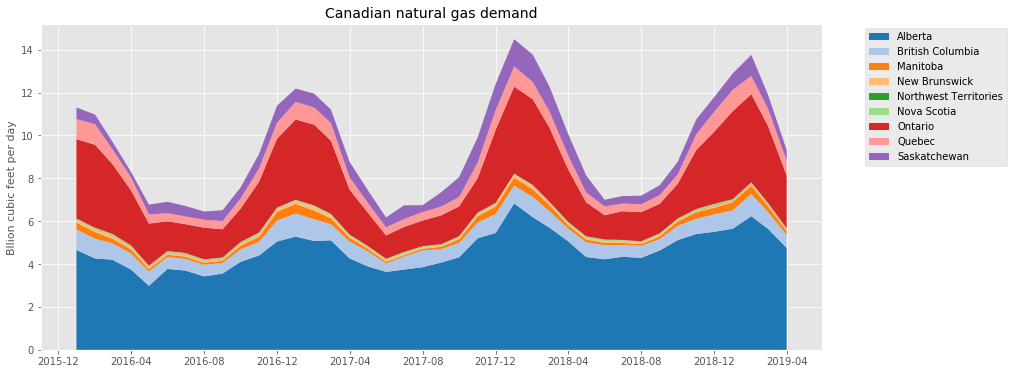

In [8]:
# create charts
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(14,6))

ax1.stackplot(df_demand_prov.index, df_demand_prov.T)
ax1.set_ylabel('Bllion cubic feet per day', fontsize=11)
ax1.set_title('Canadian natural gas demand', fontsize=14)
ax1.legend(df_demand_prov.columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4); 

Canadian natural gas demand is seasonal. Demand is highest in the winter when large amounts of natural gas is used for space heating. In January 2018, demand increased to 14.5 Bcf/d. In the summer, demand has averaged approximately 7 Bcf/d.  In general, for the last ten years, demand has been growing at a rate of X.X per cent per year. 

The largest natural gas user in Canada is the industrial sector, which includes industries such as crude oil production, petrochemicals, manufacturing and power production. Alberta is the largest user of natural gas, followed by Ontario and Saskatchewan. 

#### 3) Other datasets for Canadian natural gas demand


Daily data on total Canadian demand is not available, although paid-for research services may offer modelled daily demand projections. 

Canadian pipeline companies also publish daily gas day summary reports on their websites, which aggregate shippers' daily nominations between specific receipt and delivery points on their systems. Review of this data provides an indication of daily natural gas demand in a specific region. Major Canadian pipelines that provide gas day summary reports include: 
- TransCanada Mainline pipeline (__[link](http://www.tccustomerexpress.com/gasdaysummaryreport.html)__);
- Nova Gas Transmission pipeline (__[link](http://www.tccustomerexpress.com/gasdaysummaryreport.html)__);
- Westcoast pipeline (__[link](https://noms.wei-pipeline.com/customer-activities/pipeline.php)__);
- Union Gas pipeline (__[link](https://www.uniongas.com/storage-and-transportation/informational-postings/gas-day-summary)__);
- TransGas pipeline (__[link](https://www.transgas.com/infopostings/apps/DailyOpsDetail.aspx)__);

Annual natural gas demand data by sector is also available from Statistics Canada’s supply and demand of primary and secondary energy table (Table 25-10-0029-01, (__[link](https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=2510002901)__). The table provides data in energy units (terajoules), which allows across fuel comparisons and summations. 

### Canadian natural gas pipeline exports
Just under half of Canada's natural gas production is exported to various markets in the United States via pipelines. The four main exporting provinces (where pipelines cross the Canada-US border) are British Columbia, Saskatchewan, Manitoba and Alberta. Provinces that produce little or no natural gas can still export significant amounts, because pipelines pass through these provinces to reach key export points.

#### 1) Main dataset


The National Energy Board regulates the imports and exports of natural gas and collects import and export statistics from pipeline shippers. This information is available from the National Energy Board's Commodities Tracking System (__[link](https://apps.neb-one.gc.ca/CommodityStatistics/Statistics.aspx?language=english)__) and in flat format from Canada's Open Government website - Natural Gas Historical Summary by Port Volume - Exports (__[link](https://open.canada.ca/data/en/dataset/31853b86-2542-4450-ada7-46a94676cf61)__) and Natural Gas Historical Summary by Port Volume - Imports (__[link](https://open.canada.ca/data/en/dataset/78e5771b-ad53-45bc-955a-689cd9c69c61)__).

#### 2) Load dataset to notebook

In [9]:
# access Natural Gas Exports and Imports data
url_flows = 'https://www.neb-one.gc.ca//open/imports-exports/natural-gas-imports-exports-metric-imperial-by-month.csv'
df_flows = pd.read_csv(url_flows, index_col=None, header=0) 
df_flows['Date'] = pd.to_datetime(df_flows['Year'].astype(str) + ' ' + df_flows['Month'], format='%Y %B')
df_flows['Volume (Bcf/d)'] = df_flows['Volume'] / 1000000 / (df_flows['Date'].dt.daysinmonth)
df_flows = df_flows[(df_flows['Units'] == 'thousand cubic feet') & (df_flows['Date'].dt.year >= 2016)][['Date', 'Flow', 'Province', 'Volume (Bcf/d)']]

# get exports by province
df_exports = df_flows[df_flows['Flow'] == 'Exports'].pivot_table(index='Date', columns='Province', aggfunc=np.sum)['Volume (Bcf/d)']

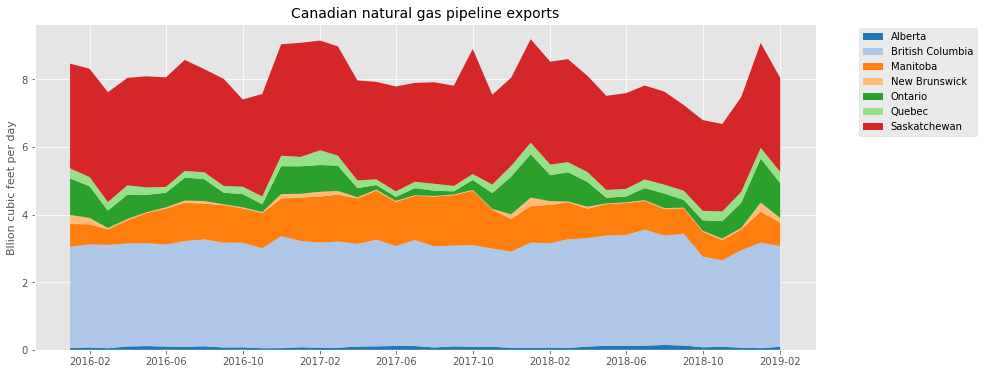

In [10]:
# create chart for exports
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(14,6))

ax1.stackplot(df_exports.index, df_exports.T)
ax1.set_ylabel('Bllion cubic feet per day', fontsize=11)
ax1.set_title('Canadian natural gas pipeline exports', fontsize=14)
ax1.legend(df_exports.columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4); 

Canada produces more natural gas than is required for domestic consumption. Remaining natural gas is exported to the United States via pipelines. In 2018, natural gas exports decreased by 6%. The four main exporting provinces (where pipelines cross the Canada-US border) are British Columbia, Saskatchewan, Manitoba and Alberta. Provinces that produce little or no natural gas can still export significant amounts, because pipelines pass through these provinces to reach key export points.

 #### 3) Other sources for Canadian natural gas exports
 
Natural gas export statistics are also published by Statistics Canada in the Supply and Disposition of Natural Gas report (CANSIM Table 25-10-0055-01), (__[link](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510005501)__).

Data on exports can also be found in the Canadian International Merchandise and Trade report (__[link](https://www5.statcan.gc.ca/cimt-cicm/home-accueil?lang=eng)__). This report aggregates international trade activities using internationally standardized Harmonized System (HS) codes, which are based on individual commodities. The HS code for natural gas is 271121 (natural gas, in gaseous state). The HS code for liquefied natural gas is 271111 (natural gas, liquefied). Data is available monthly by country (and state in the case of the US); with an approximate lag of three months. 

Both of these two reports employ a different methodology to calculate natural gas exports compared to the NEB, and therefore the data between the three reports is not the same or equivalent.

### Canadian natural gas pipeline imports

#### 1) Main dataset
The National Energy Board regulates the imports and exports of natural gas and collects import and export statistics from pipeline shippers. This information is available from the National Energy Board's Commodities Tracking System (__[link](https://apps.neb-one.gc.ca/CommodityStatistics/Statistics.aspx?language=english)__) and in flat format from Canada's Open Government website - Natural Gas Historical Summary by Port Volume - Exports (__[link](https://open.canada.ca/data/en/dataset/31853b86-2542-4450-ada7-46a94676cf61)__) and Natural Gas Historical Summary by Port Volume - Imports (__[link](https://open.canada.ca/data/en/dataset/78e5771b-ad53-45bc-955a-689cd9c69c61)__).


#### 2) Load dataset to notebook


In [11]:
# all the data for flows was download in the above section into df_flows, get the imports from the data
df_imports = df_flows[df_flows['Flow'] == 'Imports'].pivot_table(index='Date', columns='Province', aggfunc=np.sum)['Volume (Bcf/d)']

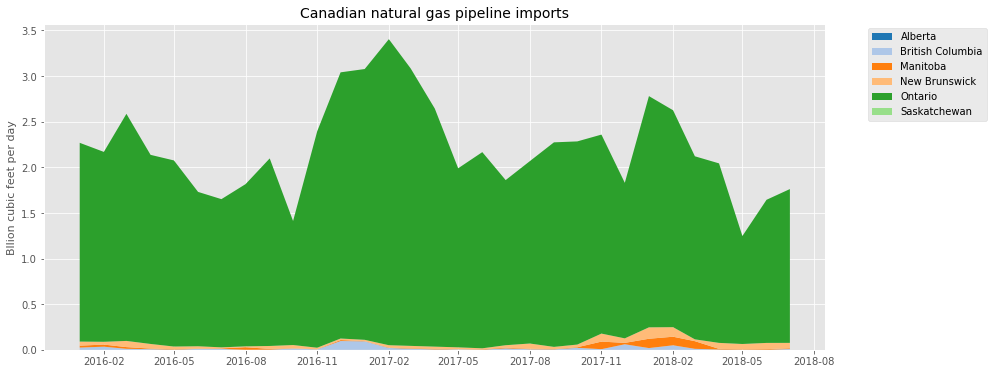

In [12]:
# create charts
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(14,6))

ax1.stackplot(df_imports.index, df_imports.T)
ax1.set_ylabel('Bllion cubic feet per day', fontsize=11)
ax1.set_title('Canadian natural gas pipeline imports', fontsize=14)
ax1.legend(df_imports.columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4); 

In 2018, imports decreased by 9%. Ontario imports the most natural gas in Canada. Imports are seasonal, and increase when demand for natural gas rises in the winter. The Maritimes also imports natural gas, but represents less than 5% of total imports.

#### 3) Other datasets for Canadian natural gas exports and imports

Natural gas import and export statistics are also published by Statistics Canada in the supply and disposition of natural gas report (CANSIM Table 25-10-0055-01) (__[link](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510005501)__). 

Data on imports and exports can also be found in the Canadian International Merchandise and Trade report (__[link](https://www5.statcan.gc.ca/cimt-cicm/home-accueil?lang=eng)__). This report aggregates imports and exports using internationally standardized Harmonized System (HS) codes, which are based on individual commodities. The HS code for natural gas is _271121_ (natural gas, in gaseous state). The HS code for liquefied natural gas is _271111_ (natural gas, liquefied). Data is available monthly by country (and state in the case of the US); with an approximate lag of three months. 

Both of these report employs a different methodology and purpose to calculate imports and exports compared to the NEB, and therefore the data between the three reports is not the same or equivalent.

### **Imports of liquefied natural gas (LNG) by source country**
Canada has one liquefied natural gas (LNG) import terminal - a facility capable of receiving marine cargos of natural gas in liquid form. The facility is named Canaport and is located in St. John, New Brunswick.

#### 1) Main dataset
The National Energy Board regulates the imports and exports of liquified natural gas and collects import and export statistics from regulated companies. This information is available from the National Energy Board's Commodities Tracking System (__[link](https://apps.neb-one.gc.ca/CommodityStatistics/Statistics.aspx?language=english)__).


#### 2) Load dataset to notebook

In [13]:
#add code once data is in Open Gov; 

In 2018, Canaport imported most of total LNG imports from Trinidad & Tobago. Cargo deliveries are periodic, with majority occurring during the winter. 

#### 3) Other sources for Canadian LNG exports

Data on LNG imports can also be found in the Canadian International Merchandise and Trade report (__[link](https://www5.statcan.gc.ca/cimt-cicm/home-accueil?lang=eng)__). This report aggregates international trade activities using internationally standardized Harmonized System (HS) codes, which are based on individual commodities.  The HS code for liquefied natural gas is 271111 (natural gas, liquefied). Data is available monthly by country (and state in the case of the US); with an approximate lag of three months. 

This report employ a different methodology to calculate natural gas exports compared to the NEB, and therefore the data between the three reports is not the same or equivalent.


### **Rig Count**
The rig count shows how many rigs are drilling for gas and indicates industry expectations of gas demand and prices. The rig count also
depends on the weather and is highly seasonal: activity is highest during winter, when the ground is frozen and rigs can move to most places.
Activity is lowest in the spring, when the ground and roads thaw and rigs must be pulled from the field.

#### 1) Main dataset
Baker Hughes is a large crude oil and natural gas extraction services company. Baker Hughes releases the North American rig count in a weekly report (__[link](http://phx.corporate-ir.net/phoenix.zhtml?c=79687&p=irol-reportsother)__). 

#### 2) Load dataset to notebook

In [14]:
# access data (Baker Hughes Summary)
# this data is in xlsb (Excel Binary) format
url_bh = 'http://phx.corporate-ir.net/phoenix.zhtml?c=79687&p=irol-reportsother'
sheet_rigs = 'Canada L & OS Split by Province'

r = requests.get(url_bh)
if r.status_code == 200:
  soup = bs(r.content, 'lxml')
  url_rigs = soup.find('a', text=re.compile('^North America Rotary Rig Count \(')).get('href')

  r = requests.get(url_rigs)
  if r.status_code == 200:
    data_rigs = []
    with open_workbook(io.BytesIO(r.content)) as wb:
      with wb.get_sheet(sheet_rigs) as ws:
        # regions are in row 6, labels in row 7, data in rows 8 and on
        for row in ws.rows():
          if row[0].r == 5:
            regions = [item.v for item in row]
          elif row[0].r == 6:
            labels = [item.v for item in row]
          elif row[0].r > 6:
            data_rigs.append([item.v for item in row])

    df_rigs = pd.DataFrame(data_rigs, columns=pd.Series(['Date'] + regions[1:]).ffill(), 
                           index=None).drop('TOTAL CANADA', 1).dropna(1, 'all').dropna(0, 'all')
    df_rigs['Date'] = pd.to_datetime(df_rigs['Date'], unit='d', origin='1899-12-30')
    df_rigs.set_index('Date', inplace=True)
    df_rigs = df_rigs.groupby(df_rigs.columns, axis=1).sum() # group provinces together
  else:
    print('Could not access Rig Count Summary file: ', url_rigs)
  df_rigs = df_rigs[(df_rigs.index.year >= 2016)][['Alberta', 'British Columbia', 'Newfound Land', 'Nova Scotia', 'Saskatchewan']]
else:
  print('Could not access Baker Hughes page: ', url_bh)

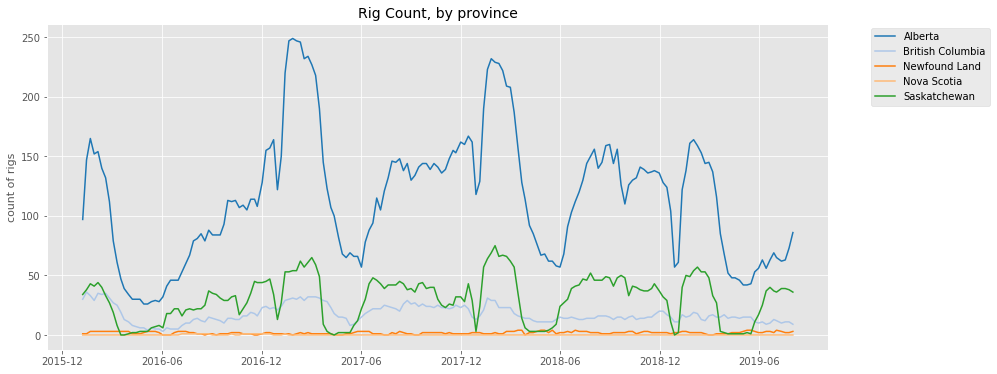

In [15]:
# create charts
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(14,6))
ax1.plot(df_rigs.index, df_rigs) 
ax1.set_ylabel('count of rigs', fontsize=11)
ax1.set_title('Rig Count, by province', fontsize=14)
ax1.legend(df_rigs.columns, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4, fontsize=10); 

The largest number of rigs in Canada are located in Alberta, where majority of Canadian natural gas production in Canada comes from. In 2018, the rig count topped in February, at 229 rigs.  

Rig activity has significant decreased since 2008, because companies have switched from drilling low productivity, vertical wells to drilling high productivity, horizontal wells. Over time, rig activity has tended to continue falling, because companies have increased their efficiencies, enabling the same rigs to drill more distance in the same amount of time. Low commodity prices for the last several years and market uncertainty were also factors in decreased rig activity in Canada.

#### 3) Other sources
The Canadian Association of Oilwell Drilling Contractors (CAODC) provides weekly and monthly summaries of drilling activity in Canada. The sites also includes locational information for each rig (__[link](https://caodc.ca/rig_reports)__). 


### Canadian natural gas supply and demand projection to 2040

#### 1) Main dataset


The National Energy Board publishes the Energy Futures report (__[link](http://apps.neb-one.gc.ca/nrg/ntgrtd/ftr/2016/index-eng.html)__) - a projection of Canadian energy supply and demand to 2040. The report includes projections for supply and demand of natural gas. Projections are modeled based on historical data, and include a series of policy, technology and market assumptions outlined in the report. The report provides modeled output data in a seres of appendices (__[link](https://apps.neb-one.gc.ca/ftrppndc/dflt.aspx?GoCTemplateCulture=en-CA)__). The report is also accompanied by a series of interactive visualizations to explore the data and compare projectsions between the 2016, 2017 and 2018 iterations of the report (__[link](https://apps2.neb-one.gc.ca/dvs/?page=landingPage&language=en)__).

#### 2) Load dataset to notebook

In [16]:
# access data 
url_ef = 'https://www.neb-one.gc.ca/nrg/ntgrtd/ftr/2018/fgrs-eng.xlsx'
sheet_gas = '3.19'
df_ef_gas = pd.read_excel(url_ef, sheet_name=sheet_gas, header=3, index_col=0).T.rename(columns = {'Net Exports':'Net Pipeline Exports'})

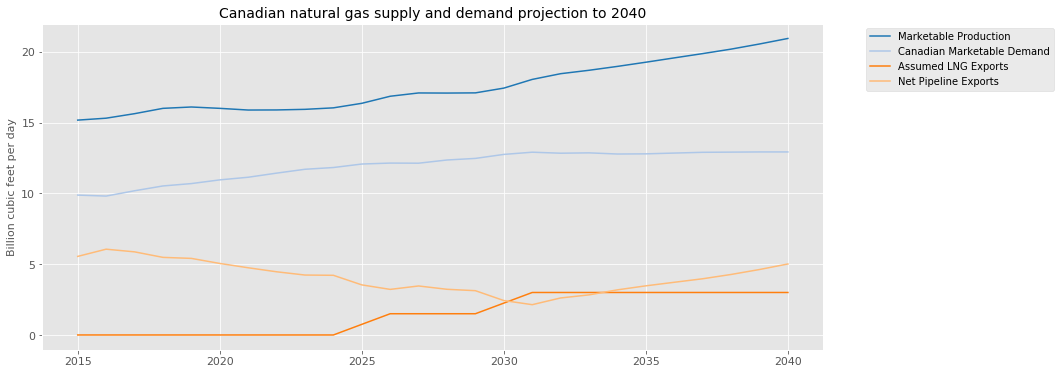

In [17]:
# chart
fig, ax = plt.subplots(ncols=1, figsize=(14,6))
ax.plot(df_ef_gas)
ax.set_title('Canadian natural gas supply and demand projection to 2040', fontsize = 14)
ax.legend(df_ef_gas.columns, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4, fontsize = 10) 
ax.set_ylabel('Billion cubic feet per day', fontsize = 11)
ax.tick_params(labelsize = 11)

The report forecasts natural gas production to increase at a rate of X.X per cent per year and average 20.9 Bcf/d, an increase of X per cent from the 2018. Natural gas demand is forecast to increase at a rate of X.X per cent per year and average 12.9 Bcf/d, an increase of X per cent from the 2018. The Energy Futures report also projects exports of liquefied natural gas to commence in 2026, increasing to 3.0 Bcf/d by 2040.

Canada's natural gas supply is projected to come primarily from two provinces - Alberta and British Columbia. Alberta' production is forecast to average 11.7 Bcf/d in 2040. British Columbia's natural gas production is forecast to more than double from today, to average 9.2 Bcf/d in 2040. Saskatchewan's production is forecast to remain steady throughout the projection period, and averages 0.3 Bcf/d in 2040.


#### 3) Other datasets for Canadian natural gas supply and demand forecast


Energy Futures is the only government-published report on Canadian energy supply and demand projections at the federal level. Provincial governments and reserach institutes also publish Canada-wide and provincial-level supply and demand projections. These inlcude:
- Alberta Energy Regulator's ST98 Report (__[link](https://www.aer.ca/providing-information/data-and-reports/statistical-reports/st98)__);
- Canadian Energy Research Institute's "Canadian Crude Oil and Natural Gas Production, Supply Costs, Economic Impacts and Emissions Outlook (2019-2039)", published in July 2019 (__[link](https://ceri.ca/studies/canadian-crude-oil-and-natural-gas-production-supply-costs-economic-impacts-and-emissions-outlook-2019-2039)__).

At the international level, other government, non-government and corporate bodies also publish global energy supply and demand statistics, which includes Canada. These include:
- US Energy Information Administration's International Energy Outlook 2018 (__[link](https://www.eia.gov/outlooks/ieo/)__);
- International Energy Agency World Energy Outlook (__[link](https://www.iea.org/weo/)__);
- Asia Pacific Energy Research Centre’s (APERC) Energy Demand and Supply Outlook (__[link](https://aperc.ieej.or.jp/publications/reports/outlook.php)__);
- BP Energy Outlook (__[link](https://www.bp.com/en/global/corporate/energy-economics/energy-outlook.html)__).

## Additional Resources
Please see the Canadian Energy Information Inventory (CCEI) (__[link](https://public.tableau.com/profile/energy.markets#!/vizhome/CanadianEnergyInformationInventoryCEII-V2_0/Datasets)__) - a government maintained searchable database for energy-related information and datasets in Canada. The CEII contains url links to over 200 datasets related to energy use and production in Canada and is searchable by issuer, commodity and category.

All the datasets used in this notebook are listed in the CEII. To provide feedback on the CEII, please email CEII-ICIE@neb-one.gc.ca.
